In [ ]:
import pandas as pd

def calculate_ema_from_csv(file_path, column_name, period):
    """
    Calculate Exponential Moving Average (EMA) from a CSV file.

    Parameters:
    file_path (str): The path to the CSV file.
    column_name (str): The column name to calculate EMA for.
    period (int): The period for the EMA.

    Returns:
    pd.Series: The calculated EMA.
    """
    # Read data from CSV
    data = pd.read_csv(file_path)

    # Ensure the specified column exists
    if column_name not in data.columns:
        raise ValueError(f"Column '{column_name}' not found in the CSV file.")

    # Calculate EMA
    ema = data[column_name].ewm(span=period, adjust=False).mean()

    return ema

# Example usage:
file_path = 'HLB_price(21~23).csv'  # Replace with your CSV file path
column_name = 'Close'  # Replace with your column name
period = 5
ema = calculate_ema_from_csv(file_path, column_name, period)
print(ema)






0      41895.000000
1      43751.333333
2      43701.555556
3      43653.703704
4      43756.469136
           ...     
734    47309.300156
735    48189.533437
736    48626.355625
737    49384.237083
738    49822.824722
Name: Close, Length: 739, dtype: float64


In [ ]:
import pandas as pd

df = pd.DataFrame(columns=['Date', 'EMA5', 'EMA20'])

# Step 2: 여러 행의 데이터를 추가하는 함수
def add_data(date, EMA5, EMA20):
    global df
    new_data = pd.DataFrame({'Date': [date], 'EMA5': [EMA5], 'EMA20' : [EMA20]})
    df = pd.concat([df, new_data], ignore_index=True)

data = pd.read_csv(file_path)
# 예제 데이터 추가
add_data(data['Date'], calculate_ema_from_csv(file_path, column_name, 5), calculate_ema_from_csv(file_path, column_name, 20))

# Step 3: DataFrame을 CSV 파일로 저장
csv_file_path = 'data.csv'
df.to_csv(csv_file_path, index=False)

print(f'Data saved to {csv_file_path}')


Data saved to data.csv


In [ ]:
import pandas as pd

# Step 1: 빈 DataFrame 생성
df = pd.DataFrame(columns=['Date', 'EMA5', 'EMA20', 'MACD', 'Signal'])

# Step 2: 여러 행의 데이터를 추가하는 함수
def add_data(date, ema5, ema20, macd, signal):
    global df
    new_data = pd.DataFrame({'Date': [date], 'EMA5': [ema5], 'EMA20': [ema20], 'MACD' : [macd], 'Signal' : [signal]})
    df = pd.concat([df, new_data], ignore_index=True)

# CSV 파일에서 데이터 읽기
file_path = 'HLB_price(20.1~24.7).csv'  # 입력 CSV 파일 경로
data = pd.read_csv(file_path)

# EMA 계산 함수 정의
def calculate_ema(data, period):
    ema = data.ewm(span=period, adjust=False).mean()
    return ema

# Close 컬럼에서 EMA(5)와 EMA(20) 계산
ema5 = calculate_ema(data['Close'], 5)
ema20 = calculate_ema(data['Close'], 20)
ema12 = calculate_ema(data['Close'], 12)
ema26 = calculate_ema(data['Close'], 26)

# MACD, signal 계산
macd = ema12 - ema26
signal = calculate_ema(macd, 9)

# 각 날짜에 대해 EMA 값을 추가
for date, e5, e20, macd, signal in zip(data['Date'], ema5, ema20, macd, signal):
    add_data(date, e5, e20, macd, signal)

# Step 3: DataFrame을 CSV 파일로 저장
csv_file_path = 'output_data.csv'  # 출력 CSV 파일 경로
df.to_csv(csv_file_path, index=False)

print(f'Data saved to {csv_file_path}')

print(ema12)


Data saved to output_data.csv
0       45495.000000
1       45139.923077
2       44704.704142
3       44526.134274
4       43928.113616
            ...     
1104    64681.535145
1105    64730.529738
1106    64602.755932
1107    63663.870404
1108    63500.198034
Name: Close, Length: 1109, dtype: float64


In [ ]:
def calculate_macd(data):
    return calculate_ema(data, 12) - calculate_ema(data, 26)

print(calculate_macd(data))

DataError: Cannot aggregate non-numeric type: object

In [ ]:
pip install scikit-learn


# **기술적 분석만 한 경우**

         Date   Open   High    Low  Close   Volume    Change          EMA5  \
0  2020-07-01  41174  41669  39244  39561  2979458 -0.140483  42361.491723   
1  2020-07-02  39740  41671  39650  41313  1636436 -0.079991  42011.994482   
2  2020-07-03  41713  41802  40726  40998   805330 -0.082408  41673.996321   
3  2020-07-06  40996  41130  40277  40504   689209 -0.070113  41283.997548   
4  2020-07-07  40549  40818  39651  39921  1219263 -0.039945  40829.665032   

          EMA20         MACD      Signal        RSI  Bollenger_high  \
0  45232.475583  -843.717950  233.211683  31.655961    53316.944700   
1  44859.192194 -1030.875834  -19.605821  38.571056    52903.468876   
2  44491.459604 -1190.889836 -253.862624  37.829926    52107.456598   
3  44111.701546 -1342.092945 -471.508688  36.640878    51672.963069   
4  43712.587113 -1491.769535 -675.560857  35.233389    51180.323509   

   Bollenger_low  
0   40615.455300  
1   40009.631124  
2   39651.443402  
3   39097.936931  
4   38562

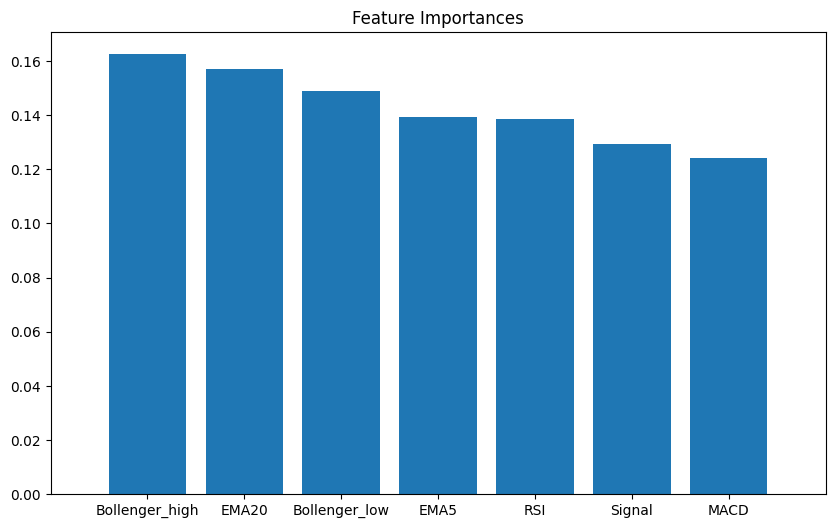

10% 이상 상승으로 예측된 날짜:
                 Date  Actual  Predicted  Actual_Return
Date                                                   
2022-04-28 2022-04-28       0          1       1.011506
2021-08-09 2021-08-09       0          1      -0.137640
2021-08-18 2021-08-18       1          1      18.212465
2021-08-17 2021-08-17       1          1      32.693191
2023-12-14 2023-12-14       1          1      25.092707
2023-09-07 2023-09-07       1          1      13.499112
2024-01-23 2024-01-23       1          1      36.594912
2023-12-13 2023-12-13       1          1      44.956772
2024-02-28 2024-02-28       0          1       3.363519
예측된 날짜의 실제 수익률:
                 Date  Actual_Return
Date                                
2021-08-18 2021-08-18      18.212465
2021-08-17 2021-08-17      32.693191
2023-12-14 2023-12-14      25.092707
2023-09-07 2023-09-07      13.499112
2024-01-23 2024-01-23      36.594912
2023-12-13 2023-12-13      44.956772
예측된 날짜의 실제 수익률 평균: 28.5081933208682


In [15]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score
import matplotlib.pyplot as plt

# CSV 파일 경로
file_path = 'HLB_invest_data.csv'

# CSV 파일 로드
data = pd.read_csv(file_path)

# 데이터 확인
print(data.head())

# 예시로, 'Date', 'Open', 'High', 'Low', 'Close', 'Volume' 열이 있다고 가정
# 타깃 변수 설정: 5 영업일 후의 주가가 현재 주가보다 10% 이상 상승했는지

# 날짜를 인덱스로 설정
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# 결측치 처리 (필요 시)
data.dropna(inplace=True)

# 목표 변수 설정
data['Target'] = (data['Close'].shift(-5) > data['Close'] * 1.10).astype(int)

# 마지막 5일은 목표 변수가 없으므로 제거
data.dropna(inplace=True)

# 특징 변수 선택
features = data[['EMA5', 'EMA20', 'MACD', 'Signal', 'Bollenger_high', 'Bollenger_low', 'RSI']]
target = data['Target']

# 훈련 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [30, 50],
    'max_features': [0.3, 0.5, 0.7]
}

# 랜덤 포레스트 분류 모델 생성
rf = RandomForestClassifier(random_state=42)

# Grid Search를 사용한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print(f'최적의 하이퍼파라미터: {grid_search.best_params_}')

# 최적의 모델로 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(f'모델 정확도: {accuracy * 100:.2f}%')
print(f'정밀도: {precision * 100:.2f}%')
print('분류 보고서:\n', classification_report(y_test, y_pred))

# 특징 중요도 시각화
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = features.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices])
plt.xlim([-1, len(importances)])
plt.show()


# 예측 결과와 날짜를 결합
X_test_with_dates = X_test.copy()
X_test_with_dates['Date'] = y_test.index

# 예측 결과와 실제 날짜를 결합
predicted_dates = X_test_with_dates.copy()
predicted_dates['Predicted'] = y_pred
predicted_dates['Actual'] = y_test.values

# 10% 이상 상승으로 예측된 날짜 필터링
predicted_dates = predicted_dates[predicted_dates['Predicted'] == 1]


# 예측된 날짜의 실제 수익률 계산
predicted_dates['Actual_Close_5Days'] = data['Close'].shift(-5).loc[predicted_dates.index]
predicted_dates['Actual_Return'] = (predicted_dates['Actual_Close_5Days'] - data['Close'].loc[predicted_dates.index]) / data['Close'].loc[predicted_dates.index] * 100

# 결과 출력
print('10% 이상 상승으로 예측된 날짜:')
print(predicted_dates[['Date', 'Actual', 'Predicted', 'Actual_Return']])

# 실제 수익률이 10% 이상인지 확인
predicted_dates = predicted_dates[predicted_dates['Actual_Return'] > 10]

# 결과 출력
print('예측된 날짜의 실제 수익률:')
print(predicted_dates[['Date', 'Actual_Return']])
print('예측된 날짜의 실제 수익률 평균:', predicted_dates['Actual_Return'].mean())


# 기술적 분석 + sns 데이터


         date  post_count  views_sum  net_recommends_sum  views_avg  \
0  2020-09-01         685   137502.0              1562.0   137502.0   
1  2020-09-02        1777   341804.0              3208.0   341804.0   
2  2020-09-03         767   170554.0              2224.0   170554.0   
3  2020-09-04         606   142396.0              1820.0   142396.0   
4  2020-09-07        2083   423958.0              4331.0   423958.0   

   net_recommends_avg  views_log_growth_5  net_recommends_log_growth_5  \
0              1598.0            0.479788                     0.262552   
1              3244.0            1.552611                     1.547871   
2              2260.0            1.742331                     1.921002   
3              1856.0            1.434607                     1.040018   
4              4367.0            0.215397                     0.297269   

   post_count_log_growth_5  views_log_growth_10  ...  Close    Volume  \
0                 0.326883             1.292044  ...  4

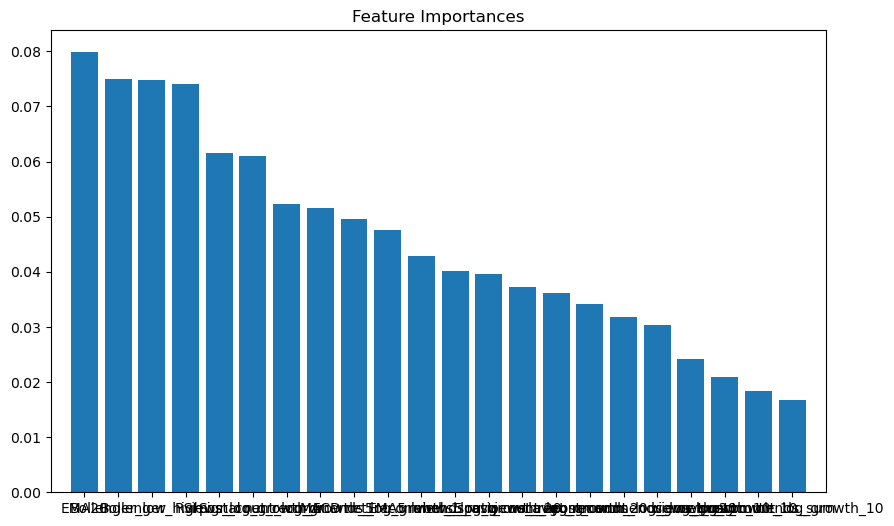

10% 이상 상승으로 예측된 날짜:
                 Date  Actual  Predicted  Actual_Return
Date                                                   
2021-08-19 2021-08-19       1          1      28.331174
2021-03-02 2021-03-02       0          1       5.977638
예측된 날짜의 실제 수익률:
                 Date  Actual_Return
Date                                
2021-08-19 2021-08-19      28.331174
예측된 날짜의 실제 수익률 평균: 28.331173739337007


In [1]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score
import matplotlib.pyplot as plt

# CSV 파일 경로
file_path = 'merged_data.csv'

# CSV 파일 로드
data = pd.read_csv(file_path)

# 데이터 확인
print(data.head())

# 예시로, 'Date', 'Open', 'High', 'Low', 'Close', 'Volume' 열이 있다고 가정
# 타깃 변수 설정: 5 영업일 후의 주가가 현재 주가보다 10% 이상 상승했는지

# 날짜를 인덱스로 설정
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# 결측치 처리 (필요 시)
data.dropna(inplace=True)

# 목표 변수 설정
data['Target'] = (data['Close'].shift(-5) > data['Close'] * 1.10).astype(int)

# 마지막 5일은 목표 변수가 없으므로 제거
data.dropna(inplace=True)

# 특징 변수 선택
features = data[['EMA5', 'EMA20', 'MACD', 'Signal', 'Bollenger_high', 'Bollenger_low', 'RSI', 'post_count', 'views_sum', 'net_recommends_sum', 'views_avg', 'net_recommends_avg', 'views_log_growth_5', 'net_recommends_log_growth_5', 'post_count_log_growth_5', 'views_log_growth_10', 'net_recommends_log_growth_10', 'post_count_log_growth_10', 'views_log_growth_20', 'net_recommends_log_growth_20', 'post_count_log_growth_20', 'label_1_ratio']]
target = data['Target']

# 훈련 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [30, 50],
    'max_features': [0.3, 0.5, 0.7]
}

# 랜덤 포레스트 분류 모델 생성
rf = RandomForestClassifier(random_state=42)

# Grid Search를 사용한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print(f'최적의 하이퍼파라미터: {grid_search.best_params_}')

# 최적의 모델로 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(f'모델 정확도: {accuracy * 100:.2f}%')
print(f'정밀도: {precision * 100:.2f}%')
print('분류 보고서:\n', classification_report(y_test, y_pred))

# 특징 중요도 시각화
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = features.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices])
plt.xlim([-1, len(importances)])
plt.show()


# 예측 결과와 날짜를 결합
X_test_with_dates = X_test.copy()
X_test_with_dates['Date'] = y_test.index

# 예측 결과와 실제 날짜를 결합
predicted_dates = X_test_with_dates.copy()
predicted_dates['Predicted'] = y_pred
predicted_dates['Actual'] = y_test.values

# 10% 이상 상승으로 예측된 날짜 필터링
predicted_dates = predicted_dates[predicted_dates['Predicted'] == 1]


# 예측된 날짜의 실제 수익률 계산
predicted_dates['Actual_Close_5Days'] = data['Close'].shift(-5).loc[predicted_dates.index]
predicted_dates['Actual_Return'] = (predicted_dates['Actual_Close_5Days'] - data['Close'].loc[predicted_dates.index]) / data['Close'].loc[predicted_dates.index] * 100

# 결과 출력
print('10% 이상 상승으로 예측된 날짜:')
print(predicted_dates[['Date', 'Actual', 'Predicted', 'Actual_Return']])

# 실제 수익률이 10% 이상인지 확인
predicted_dates = predicted_dates[predicted_dates['Actual_Return'] > 10]

# 결과 출력
print('예측된 날짜의 실제 수익률:')
print(predicted_dates[['Date', 'Actual_Return']])
print('예측된 날짜의 실제 수익률 평균:', predicted_dates['Actual_Return'].mean())


         date  post_count  views_sum  net_recommends_sum  views_avg  \
0  2020-09-01         685   137502.0              1562.0   137502.0   
1  2020-09-02        1777   341804.0              3208.0   341804.0   
2  2020-09-03         767   170554.0              2224.0   170554.0   
3  2020-09-04         606   142396.0              1820.0   142396.0   
4  2020-09-07        2083   423958.0              4331.0   423958.0   

   net_recommends_avg  views_log_growth_5  net_recommends_log_growth_5  \
0              1598.0            0.479788                     0.262552   
1              3244.0            1.552611                     1.547871   
2              2260.0            1.742331                     1.921002   
3              1856.0            1.434607                     1.040018   
4              4367.0            0.215397                     0.297269   

   post_count_log_growth_5  views_log_growth_10  ...  Close    Volume  \
0                 0.326883             1.292044  ...  4

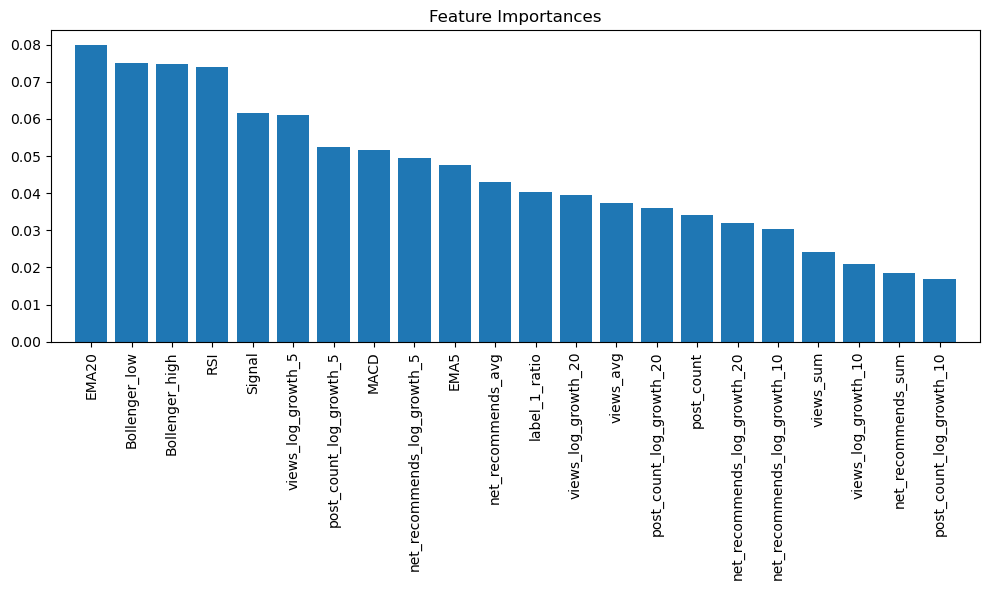

10% 이상 상승으로 예측된 날짜:
                 Date  Actual  Predicted  Actual_Return
Date                                                   
2021-08-19 2021-08-19       1          1      28.331174
2021-03-02 2021-03-02       0          1       5.977638
예측된 날짜 중 실제 수익률이 10% 이상인 경우:
                 Date  Actual_Return
Date                                
2021-08-19 2021-08-19      28.331174
예측된 날짜의 실제 수익률 평균: 28.331173739337007


/var/folders/9d/xs8v3c9d6glc7zj9lrz0vjhr0000gn/T/ipykernel_3490/3262455248.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicted_dates_10['Actual_Close_5Days'] = data['Close'].shift(-5).loc[predicted_dates_10.index]
/var/folders/9d/xs8v3c9d6glc7zj9lrz0vjhr0000gn/T/ipykernel_3490/3262455248.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicted_dates_10['Actual_Return'] = (predicted_dates_10['Actual_Close_5Days'] - data['Close'].loc[predicted_dates_10.index]) / data['Close'].loc[predicted_da

In [2]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score
import matplotlib.pyplot as plt

# CSV 파일 경로
file_path = 'merged_data.csv'

# CSV 파일 로드
data = pd.read_csv(file_path)

# 데이터 확인
print(data.head())

# 날짜를 인덱스로 설정
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# 결측치 처리 (필요 시)
data.dropna(inplace=True)

# 목표 변수 설정
data['Target'] = (data['Close'].shift(-5) > data['Close'] * 1.10).astype(int)

# 마지막 5일은 목표 변수가 없으므로 제거
data.dropna(inplace=True)

# 특징 변수 선택
features = data[['EMA5', 'EMA20', 'MACD', 'Signal', 'Bollenger_high', 'Bollenger_low', 'RSI', 'post_count', 'views_sum', 'net_recommends_sum', 'views_avg', 'net_recommends_avg', 'views_log_growth_5', 'net_recommends_log_growth_5', 'post_count_log_growth_5', 'views_log_growth_10', 'net_recommends_log_growth_10', 'post_count_log_growth_10', 'views_log_growth_20', 'net_recommends_log_growth_20', 'post_count_log_growth_20', 'label_1_ratio']]
target = data['Target']

# 훈련 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [30, 50],
    'max_features': [0.3, 0.5, 0.7]
}

# 랜덤 포레스트 분류 모델 생성
rf = RandomForestClassifier(random_state=42)

# Grid Search를 사용한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print(f'최적의 하이퍼파라미터: {grid_search.best_params_}')

# 최적의 모델로 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(f'모델 정확도: {accuracy * 100:.2f}%')
print(f'정밀도: {precision * 100:.2f}%')
print('분류 보고서:\n', classification_report(y_test, y_pred))

# 특징 중요도 시각화
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = features.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.tight_layout()
plt.show()

# 예측 결과와 실제 날짜를 결합
X_test_with_dates = X_test.copy()
X_test_with_dates['Date'] = y_test.index

# 예측 결과와 실제 날짜를 결합
predicted_dates = X_test_with_dates.copy()
predicted_dates['Predicted'] = y_pred
predicted_dates['Actual'] = y_test.values

# 10% 이상 상승으로 예측된 날짜 필터링
predicted_dates_10 = predicted_dates[predicted_dates['Predicted'] == 1]

# 예측된 날짜의 실제 수익률 계산
predicted_dates_10['Actual_Close_5Days'] = data['Close'].shift(-5).loc[predicted_dates_10.index]
predicted_dates_10['Actual_Return'] = (predicted_dates_10['Actual_Close_5Days'] - data['Close'].loc[predicted_dates_10.index]) / data['Close'].loc[predicted_dates_10.index] * 100

# 결과 출력
print('10% 이상 상승으로 예측된 날짜:')
print(predicted_dates_10[['Date', 'Actual', 'Predicted', 'Actual_Return']])

# 실제 수익률이 10% 이상인지 확인
actual_10 = predicted_dates_10[predicted_dates_10['Actual_Return'] > 10]

# 결과 출력
print('예측된 날짜 중 실제 수익률이 10% 이상인 경우:')
print(actual_10[['Date', 'Actual_Return']])
print('예측된 날짜의 실제 수익률 평균:', actual_10['Actual_Return'].mean())


         date  post_count  views_sum  net_recommends_sum  views_avg  \
0  2020-09-01         685   137502.0              1562.0   137502.0   
1  2020-09-02        1777   341804.0              3208.0   341804.0   
2  2020-09-03         767   170554.0              2224.0   170554.0   
3  2020-09-04         606   142396.0              1820.0   142396.0   
4  2020-09-07        2083   423958.0              4331.0   423958.0   

   net_recommends_avg  views_log_growth_5  net_recommends_log_growth_5  \
0              1598.0            0.479788                     0.262552   
1              3244.0            1.552611                     1.547871   
2              2260.0            1.742331                     1.921002   
3              1856.0            1.434607                     1.040018   
4              4367.0            0.215397                     0.297269   

   post_count_log_growth_5  views_log_growth_10  ...  Close    Volume  \
0                 0.326883             1.292044  ...  4

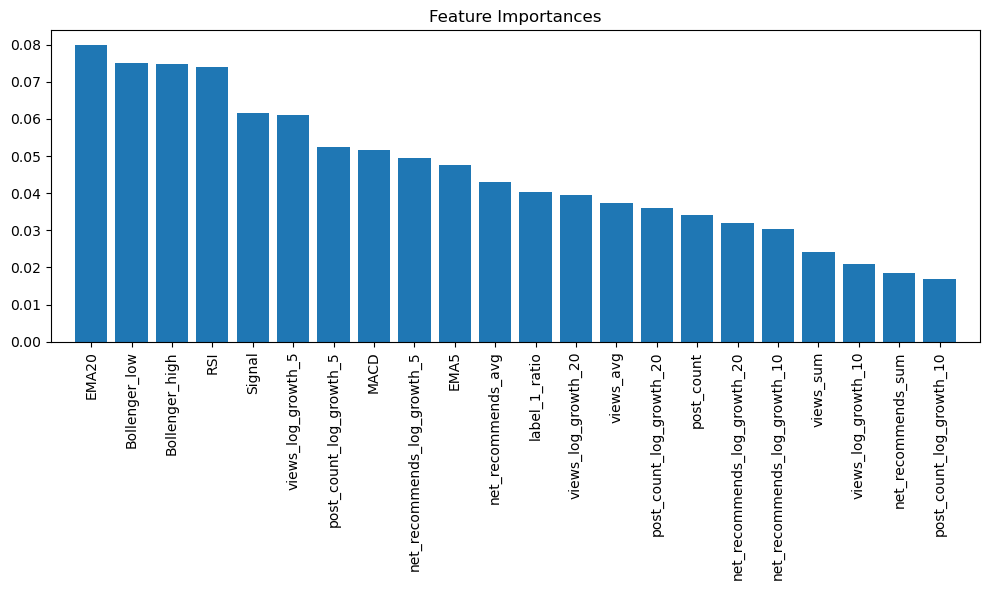

10% 이상 상승으로 예측된 날짜:
                 Date  Actual  Predicted  Actual_Return
Date                                                   
2021-08-19 2021-08-19       1          1      28.331174
2021-03-02 2021-03-02       0          1       5.977638
예측된 날짜 중 실제 수익률이 10% 이상인 경우:
                 Date  Actual_Return
Date                                
2021-08-19 2021-08-19      28.331174
예측된 날짜의 실제 수익률 평균: 28.331173739337007
테스트 데이터에서 실제로 수익률이 10% 넘는 경우:
                 Date  Actual_Return
Date                                
2023-12-13 2023-12-13      44.956772
2024-04-17 2024-04-17      16.416309
2021-08-19 2021-08-19      28.331174
2021-08-12 2021-08-12      15.878882
2023-10-30 2023-10-30      14.776632
2022-07-01 2022-07-01      15.308792
2023-02-15 2023-02-15      19.206211
2020-11-30 2020-11-30      16.686223
2021-08-31 2021-08-31      21.984291
2024-02-16 2024-02-16      14.723032
2024-04-16 2024-04-16      12.197687
2024-03-04 2024-03-04      22.533496
2020-12-24 2020-12-24      18.

/var/folders/9d/xs8v3c9d6glc7zj9lrz0vjhr0000gn/T/ipykernel_3490/2712350149.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicted_dates_10['Actual_Close_5Days'] = data['Close'].shift(-5).loc[predicted_dates_10.index]
/var/folders/9d/xs8v3c9d6glc7zj9lrz0vjhr0000gn/T/ipykernel_3490/2712350149.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicted_dates_10['Actual_Return'] = (predicted_dates_10['Actual_Close_5Days'] - data['Close'].loc[predicted_dates_10.index]) / data['Close'].loc[predicted_da

In [3]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score
import matplotlib.pyplot as plt

# CSV 파일 경로
file_path = 'merged_data.csv'

# CSV 파일 로드
data = pd.read_csv(file_path)

# 데이터 확인
print(data.head())

# 날짜를 인덱스로 설정
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# 결측치 처리 (필요 시)
data.dropna(inplace=True)

# 목표 변수 설정
data['Target'] = (data['Close'].shift(-5) > data['Close'] * 1.10).astype(int)

# 마지막 5일은 목표 변수가 없으므로 제거
data.dropna(inplace=True)

# 특징 변수 선택
features = data[['EMA5', 'EMA20', 'MACD', 'Signal', 'Bollenger_high', 'Bollenger_low', 'RSI', 'post_count', 'views_sum', 'net_recommends_sum', 'views_avg', 'net_recommends_avg', 'views_log_growth_5', 'net_recommends_log_growth_5', 'post_count_log_growth_5', 'views_log_growth_10', 'net_recommends_log_growth_10', 'post_count_log_growth_10', 'views_log_growth_20', 'net_recommends_log_growth_20', 'post_count_log_growth_20', 'label_1_ratio']]
target = data['Target']

# 훈련 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [30, 50],
    'max_features': [0.3, 0.5, 0.7]
}

# 랜덤 포레스트 분류 모델 생성
rf = RandomForestClassifier(random_state=42)

# Grid Search를 사용한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print(f'최적의 하이퍼파라미터: {grid_search.best_params_}')

# 최적의 모델로 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(f'모델 정확도: {accuracy * 100:.2f}%')
print(f'정밀도: {precision * 100:.2f}%')
print('분류 보고서:\n', classification_report(y_test, y_pred))

# 특징 중요도 시각화
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = features.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.tight_layout()
plt.show()

# 예측 결과와 실제 날짜를 결합
X_test_with_dates = X_test.copy()
X_test_with_dates['Date'] = y_test.index

# 예측 결과와 실제 날짜를 결합
predicted_dates = X_test_with_dates.copy()
predicted_dates['Predicted'] = y_pred
predicted_dates['Actual'] = y_test.values

# 10% 이상 상승으로 예측된 날짜 필터링
predicted_dates_10 = predicted_dates[predicted_dates['Predicted'] == 1]

# 예측된 날짜의 실제 수익률 계산
predicted_dates_10['Actual_Close_5Days'] = data['Close'].shift(-5).loc[predicted_dates_10.index]
predicted_dates_10['Actual_Return'] = (predicted_dates_10['Actual_Close_5Days'] - data['Close'].loc[predicted_dates_10.index]) / data['Close'].loc[predicted_dates_10.index] * 100

# 결과 출력
print('10% 이상 상승으로 예측된 날짜:')
print(predicted_dates_10[['Date', 'Actual', 'Predicted', 'Actual_Return']])

# 실제 수익률이 10% 이상인지 확인
actual_10 = predicted_dates_10[predicted_dates_10['Actual_Return'] > 10]

# 결과 출력
print('예측된 날짜 중 실제 수익률이 10% 이상인 경우:')
print(actual_10[['Date', 'Actual_Return']])
print('예측된 날짜의 실제 수익률 평균:', actual_10['Actual_Return'].mean())

# 테스트 데이터에서 실제로 수익률이 10% 넘는 경우를 출력
y_test_with_dates = X_test.copy()
y_test_with_dates['Date'] = y_test.index
y_test_with_dates['Close'] = data['Close'].loc[y_test.index]
y_test_with_dates['Close_5Days'] = data['Close'].shift(-5).loc[y_test.index]
y_test_with_dates['Actual_Return'] = (y_test_with_dates['Close_5Days'] - y_test_with_dates['Close']) / y_test_with_dates['Close'] * 100
actual_test_10 = y_test_with_dates[y_test_with_dates['Actual_Return'] > 10]

# 결과 출력
print('테스트 데이터에서 실제로 수익률이 10% 넘는 경우:')
print(actual_test_10[['Date', 'Actual_Return']])


         date  post_count  views_sum  net_recommends_sum  views_avg  \
0  2020-09-01         685   137502.0              1562.0   137502.0   
1  2020-09-02        1777   341804.0              3208.0   341804.0   
2  2020-09-03         767   170554.0              2224.0   170554.0   
3  2020-09-04         606   142396.0              1820.0   142396.0   
4  2020-09-07        2083   423958.0              4331.0   423958.0   

   net_recommends_avg  views_log_growth_5  net_recommends_log_growth_5  \
0              1598.0            0.479788                     0.262552   
1              3244.0            1.552611                     1.547871   
2              2260.0            1.742331                     1.921002   
3              1856.0            1.434607                     1.040018   
4              4367.0            0.215397                     0.297269   

   post_count_log_growth_5  views_log_growth_10  ...  Close    Volume  \
0                 0.326883             1.292044  ...  4

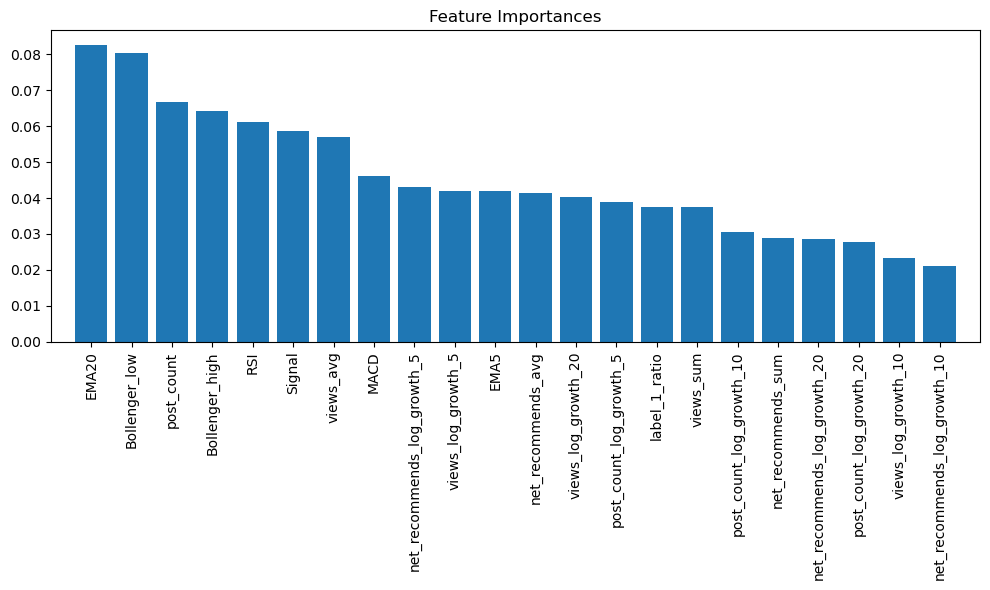

10% 이상 상승으로 예측된 날짜:
                 Date  Actual  Predicted  Actual_Return
Date                                                   
2024-05-23 2024-05-23       1          1      26.283368
2022-05-16 2022-05-16       0          1       8.579338
2021-08-26 2021-08-26       1          1      21.510760
2021-08-27 2021-08-27       1          1      20.482903
2022-05-10 2022-05-10       1          1      58.138189
2021-08-17 2021-08-17       1          1      32.693191
2024-05-17 2024-05-17       0          1     -24.441133
2024-02-28 2024-02-28       0          1       3.363519
2024-05-22 2024-05-22       1          1      34.077079
2024-03-18 2024-03-18       1          1      17.623762
2022-08-12 2022-08-12       0          1       0.774412
예측된 날짜 중 실제 수익률이 10% 이상인 경우:
                 Date  Actual_Return
Date                                
2024-05-23 2024-05-23      26.283368
2021-08-26 2021-08-26      21.510760
2021-08-27 2021-08-27      20.482903
2022-05-10 2022-05-10      58.138189
2

In [8]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score
import matplotlib.pyplot as plt

# CSV 파일 경로
file_path = 'merged_data.csv'

# CSV 파일 로드
data = pd.read_csv(file_path)

# 데이터 확인
print(data.head())

# 날짜를 인덱스로 설정
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# 결측치 처리 (필요 시)
data.dropna(inplace=True)

# 목표 변수 설정
data['Target'] = (data['Close'].shift(-5) > data['Close'] * 1.10).astype(int)

# 마지막 5일은 목표 변수가 없으므로 제거
data.dropna(inplace=True)

# 특징 변수 선택
features = data[['EMA5', 'EMA20', 'MACD', 'Signal', 'Bollenger_high', 'Bollenger_low', 'RSI', 'post_count', 'views_sum', 'net_recommends_sum', 'views_avg', 'net_recommends_avg', 'views_log_growth_5', 'net_recommends_log_growth_5', 'post_count_log_growth_5', 'views_log_growth_10', 'net_recommends_log_growth_10', 'post_count_log_growth_10', 'views_log_growth_20', 'net_recommends_log_growth_20', 'post_count_log_growth_20', 'label_1_ratio']]
target = data['Target']

# 훈련 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [30, 50],
    'max_features': [0.3, 0.5, 0.7]
}

# 랜덤 포레스트 분류 모델 생성
rf = RandomForestClassifier(random_state=42)

# Grid Search를 사용한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print(f'최적의 하이퍼파라미터: {grid_search.best_params_}')

# 최적의 모델로 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(f'모델 정확도: {accuracy * 100:.2f}%')
print(f'정밀도: {precision * 100:.2f}%')
print('분류 보고서:\n', classification_report(y_test, y_pred))

# 특징 중요도 시각화
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = features.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.tight_layout()
plt.show()

# 예측 결과와 실제 날짜를 결합
X_test_with_dates = X_test.copy()
X_test_with_dates['Date'] = y_test.index

# 예측 결과와 실제 날짜를 결합
predicted_dates = X_test_with_dates.copy()
predicted_dates['Predicted'] = y_pred
predicted_dates['Actual'] = y_test.values

# 10% 이상 상승으로 예측된 날짜 필터링
predicted_dates_10 = predicted_dates[predicted_dates['Predicted'] == 1].copy()

# 예측된 날짜의 실제 수익률 계산
predicted_dates_10.loc[:, 'Actual_Close_5Days'] = data['Close'].shift(-5).loc[predicted_dates_10.index]
predicted_dates_10.loc[:, 'Actual_Return'] = (predicted_dates_10['Actual_Close_5Days'] - data['Close'].loc[predicted_dates_10.index]) / data['Close'].loc[predicted_dates_10.index] * 100

# 결과 출력
print('10% 이상 상승으로 예측된 날짜:')
print(predicted_dates_10[['Date', 'Actual', 'Predicted', 'Actual_Return']])

# 실제 수익률이 10% 이상인지 확인
actual_10 = predicted_dates_10[predicted_dates_10['Actual_Return'] > 10]

# 결과 출력
print('예측된 날짜 중 실제 수익률이 10% 이상인 경우:')
print(actual_10[['Date', 'Actual_Return']])
print('예측된 날짜의 실제 수익률 평균:', actual_10['Actual_Return'].mean())

# 테스트 데이터에서 실제로 수익률이 10% 넘는 경우를 출력
y_test_with_dates = X_test.copy()
y_test_with_dates['Date'] = y_test.index
y_test_with_dates['Close'] = data['Close'].loc[y_test.index]
y_test_with_dates['Close_5Days'] = data['Close'].shift(-5).loc[y_test.index]
y_test_with_dates['Actual_Return'] = (y_test_with_dates['Close_5Days'] - y_test_with_dates['Close']) / y_test_with_dates['Close'] * 100
actual_test_10 = y_test_with_dates[y_test_with_dates['Actual_Return'] > 10]

# 결과 출력
print('테스트 데이터에서 실제로 수익률이 10% 넘는 경우:')
print(actual_test_10[['Date', 'Actual_Return']])


         date  post_count  views_sum  net_recommends_sum  views_avg  \
0  2020-09-01         685   137502.0              1562.0   137502.0   
1  2020-09-02        1777   341804.0              3208.0   341804.0   
2  2020-09-03         767   170554.0              2224.0   170554.0   
3  2020-09-04         606   142396.0              1820.0   142396.0   
4  2020-09-07        2083   423958.0              4331.0   423958.0   

   net_recommends_avg  views_log_growth_5  net_recommends_log_growth_5  \
0              1598.0            0.479788                     0.262552   
1              3244.0            1.552611                     1.547871   
2              2260.0            1.742331                     1.921002   
3              1856.0            1.434607                     1.040018   
4              4367.0            0.215397                     0.297269   

   post_count_log_growth_5  views_log_growth_10  ...  Close    Volume  \
0                 0.326883             1.292044  ...  4

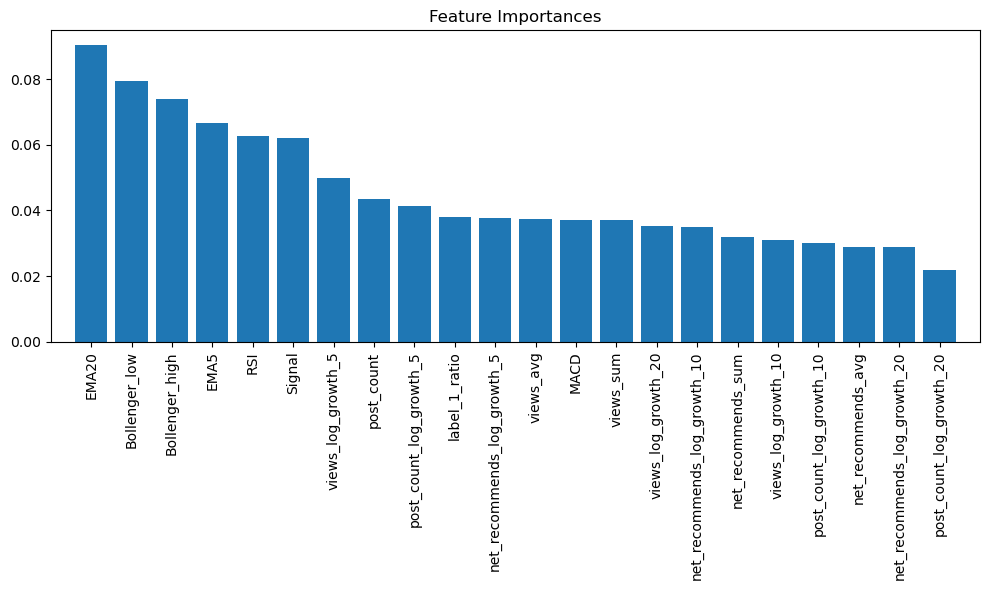

테스트 데이터에서 실제로 수익률이 10% 넘는 경우:
          Date  Actual_Return
23  2021-08-12      15.878882
24  2021-08-19      28.331174
45  2022-07-01      15.308792
81  2023-10-30      14.776632
83  2023-12-13      44.956772
..         ...            ...
892 2022-05-06      41.905223
895 2022-07-06      23.639482
925 2023-09-08      12.105263
934 2024-01-16      17.201835
935 2024-01-29      12.361331

[103 rows x 2 columns]


In [9]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score
import matplotlib.pyplot as plt

# CSV 파일 경로
file_path = 'merged_data.csv'

# CSV 파일 로드
data = pd.read_csv(file_path)

# 데이터 확인
print(data.head())

# 날짜를 인덱스로 설정
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# 결측치 처리 (필요 시)
data.dropna(inplace=True)

# 목표 변수 설정
data['Target'] = (data['Close'].shift(-5) > data['Close'] * 1.10).astype(int)

# 마지막 5일은 목표 변수가 없으므로 제거
data.dropna(inplace=True)

# 특징 변수 선택
features = data[['EMA5', 'EMA20', 'MACD', 'Signal', 'Bollenger_high', 'Bollenger_low', 'RSI', 'post_count', 'views_sum', 'net_recommends_sum', 'views_avg', 'net_recommends_avg', 'views_log_growth_5', 'net_recommends_log_growth_5', 'post_count_log_growth_5', 'views_log_growth_10', 'net_recommends_log_growth_10', 'post_count_log_growth_10', 'views_log_growth_20', 'net_recommends_log_growth_20', 'post_count_log_growth_20', 'label_1_ratio']]
target = data['Target']

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [30, 50],
    'max_features': [0.3, 0.5, 0.7]
}

# 랜덤 포레스트 분류 모델 생성
rf = RandomForestClassifier(random_state=42)

# KFold 설정
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# 교차 검증 수행
accuracy_scores = []
precision_scores = []
fold_predictions = []
fold_indices = []

for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    fold_predictions.append((y_test, y_pred))
    fold_indices.append(test_index)
    
    print(f'Fold 결과: 정확도: {accuracy * 100:.2f}%, 정밀도: {precision * 100:.2f}%')
    print('분류 보고서:\n', classification_report(y_test, y_pred))

# 전체 교차 검증 결과 출력
print(f'\n전체 10-fold 교차 검증 결과:')
print(f'평균 정확도: {np.mean(accuracy_scores) * 100:.2f}%')
print(f'평균 정밀도: {np.mean(precision_scores) * 100:.2f}%')

# 최적 모델로 전체 데이터 학습
best_model.fit(features, target)

# 특징 중요도 시각화
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = features.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.tight_layout()
plt.show()

# 테스트 데이터에서 실제로 수익률이 10% 넘는 경우를 출력
all_test_indices = np.concatenate(fold_indices)
all_predictions = np.concatenate([pred for _, pred in fold_predictions])
all_true_values = np.concatenate([true for true, _ in fold_predictions])

test_results = pd.DataFrame({
    'Date': data.index[all_test_indices],
    'Actual': all_true_values,
    'Predicted': all_predictions
})

test_results['Close'] = data['Close'].iloc[all_test_indices].values
test_results['Close_5Days'] = data['Close'].shift(-5).iloc[all_test_indices].values
test_results['Actual_Return'] = (test_results['Close_5Days'] - test_results['Close']) / test_results['Close'] * 100
actual_test_10 = test_results[test_results['Actual_Return'] > 10]

# 결과 출력
print('테스트 데이터에서 실제로 수익률이 10% 넘는 경우:')
print(actual_test_10[['Date', 'Actual_Return']])


         date  post_count  views_sum  net_recommends_sum  views_avg  \
0  2020-09-01         685   137502.0              1562.0   137502.0   
1  2020-09-02        1777   341804.0              3208.0   341804.0   
2  2020-09-03         767   170554.0              2224.0   170554.0   
3  2020-09-04         606   142396.0              1820.0   142396.0   
4  2020-09-07        2083   423958.0              4331.0   423958.0   

   net_recommends_avg  views_log_growth_5  net_recommends_log_growth_5  \
0              1598.0            0.479788                     0.262552   
1              3244.0            1.552611                     1.547871   
2              2260.0            1.742331                     1.921002   
3              1856.0            1.434607                     1.040018   
4              4367.0            0.215397                     0.297269   

   post_count_log_growth_5  views_log_growth_10  ...  Close    Volume  \
0                 0.326883             1.292044  ...  4

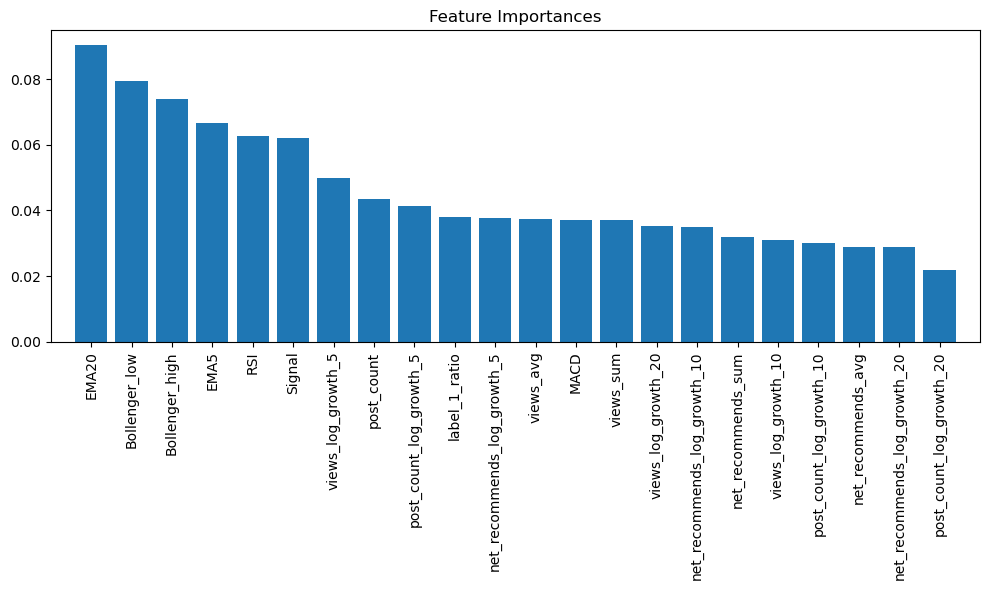

테스트 데이터에서 실제로 수익률이 10% 넘는 경우:
          Date  Actual_Return
23  2021-08-12      15.878882
24  2021-08-19      28.331174
45  2022-07-01      15.308792
81  2023-10-30      14.776632
83  2023-12-13      44.956772
..         ...            ...
892 2022-05-06      41.905223
895 2022-07-06      23.639482
925 2023-09-08      12.105263
934 2024-01-16      17.201835
935 2024-01-29      12.361331

[103 rows x 2 columns]


In [10]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score
import matplotlib.pyplot as plt

# CSV 파일 경로
file_path = 'merged_data.csv'

# CSV 파일 로드
data = pd.read_csv(file_path)

# 데이터 확인
print(data.head())

# 날짜를 인덱스로 설정
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# 결측치 처리 (필요 시)
data.dropna(inplace=True)

# 목표 변수 설정
data['Target'] = (data['Close'].shift(-5) > data['Close'] * 1.10).astype(int)

# 마지막 5일은 목표 변수가 없으므로 제거
data.dropna(inplace=True)

# 특징 변수 선택
features = data[['EMA5', 'EMA20', 'MACD', 'Signal', 'Bollenger_high', 'Bollenger_low', 'RSI', 'post_count', 'views_sum', 'net_recommends_sum', 'views_avg', 'net_recommends_avg', 'views_log_growth_5', 'net_recommends_log_growth_5', 'post_count_log_growth_5', 'views_log_growth_10', 'net_recommends_log_growth_10', 'post_count_log_growth_10', 'views_log_growth_20', 'net_recommends_log_growth_20', 'post_count_log_growth_20', 'label_1_ratio']]
target = data['Target']

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [30, 50],
    'max_features': [0.3, 0.5, 0.7]
}

# 랜덤 포레스트 분류 모델 생성
rf = RandomForestClassifier(random_state=42)

# KFold 설정
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# 교차 검증 수행
accuracy_scores = []
precision_scores = []
average_returns = []

for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    
    # 10% 이상 상승으로 예측된 날짜 필터링
    predicted_dates_10 = X_test.copy()
    predicted_dates_10['Predicted'] = y_pred
    predicted_dates_10 = predicted_dates_10[predicted_dates_10['Predicted'] == 1]
    
    # 예측된 날짜의 실제 수익률 계산
    predicted_dates_10['Actual_Close_5Days'] = data['Close'].shift(-5).iloc[test_index]
    predicted_dates_10['Close'] = data['Close'].iloc[test_index]
    predicted_dates_10['Actual_Return'] = (predicted_dates_10['Actual_Close_5Days'] - predicted_dates_10['Close']) / predicted_dates_10['Close'] * 100
    
    # 실제 수익률이 10% 이상인지 확인
    actual_10 = predicted_dates_10[predicted_dates_10['Actual_Return'] > 10]
    average_return = actual_10['Actual_Return'].mean()
    average_returns.append(average_return)
    
    print(f'Fold 결과: 정확도: {accuracy * 100:.2f}%, 정밀도: {precision * 100:.2f}%')
    print('분류 보고서:\n', classification_report(y_test, y_pred))
    print(f'Fold에서 10% 이상 상승으로 예측된 경우의 평균 실제 수익률: {average_return:.2f}%')

# 전체 교차 검증 결과 출력
print(f'\n전체 10-fold 교차 검증 결과:')
print(f'평균 정확도: {np.mean(accuracy_scores) * 100:.2f}%')
print(f'평균 정밀도: {np.mean(precision_scores) * 100:.2f}%')
print(f'평균 예측된 10% 이상 수익의 실제 평균 수익률: {np.nanmean(average_returns):.2f}%')

# 최적 모델로 전체 데이터 학습
best_model.fit(features, target)

# 특징 중요도 시각화
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = features.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.tight_layout()
plt.show()

# 테스트 데이터에서 실제로 수익률이 10% 넘는 경우를 출력
all_test_indices = np.concatenate([test_index for _, test_index in kf.split(features)])
all_predictions = np.concatenate([best_model.predict(features.iloc[test_index]) for _, test_index in kf.split(features)])
all_true_values = target.iloc[all_test_indices].values

test_results = pd.DataFrame({
    'Date': data.index[all_test_indices],
    'Actual': all_true_values,
    'Predicted': all_predictions
})

test_results['Close'] = data['Close'].iloc[all_test_indices].values
test_results['Close_5Days'] = data['Close'].shift(-5).iloc[all_test_indices].values
test_results['Actual_Return'] = (test_results['Close_5Days'] - test_results['Close']) / test_results['Close'] * 100
actual_test_10 = test_results[test_results['Actual_Return'] > 10]

# 결과 출력
print('테스트 데이터에서 실제로 수익률이 10% 넘는 경우:')
print(actual_test_10[['Date', 'Actual_Return']])


         date  post_count  views_sum  net_recommends_sum  views_avg  \
0  2020-09-01         685   137502.0              1562.0   137502.0   
1  2020-09-02        1777   341804.0              3208.0   341804.0   
2  2020-09-03         767   170554.0              2224.0   170554.0   
3  2020-09-04         606   142396.0              1820.0   142396.0   
4  2020-09-07        2083   423958.0              4331.0   423958.0   

   net_recommends_avg  views_log_growth_5  net_recommends_log_growth_5  \
0              1598.0            0.479788                     0.262552   
1              3244.0            1.552611                     1.547871   
2              2260.0            1.742331                     1.921002   
3              1856.0            1.434607                     1.040018   
4              4367.0            0.215397                     0.297269   

   post_count_log_growth_5  views_log_growth_10  ...  Close    Volume  \
0                 0.326883             1.292044  ...  4

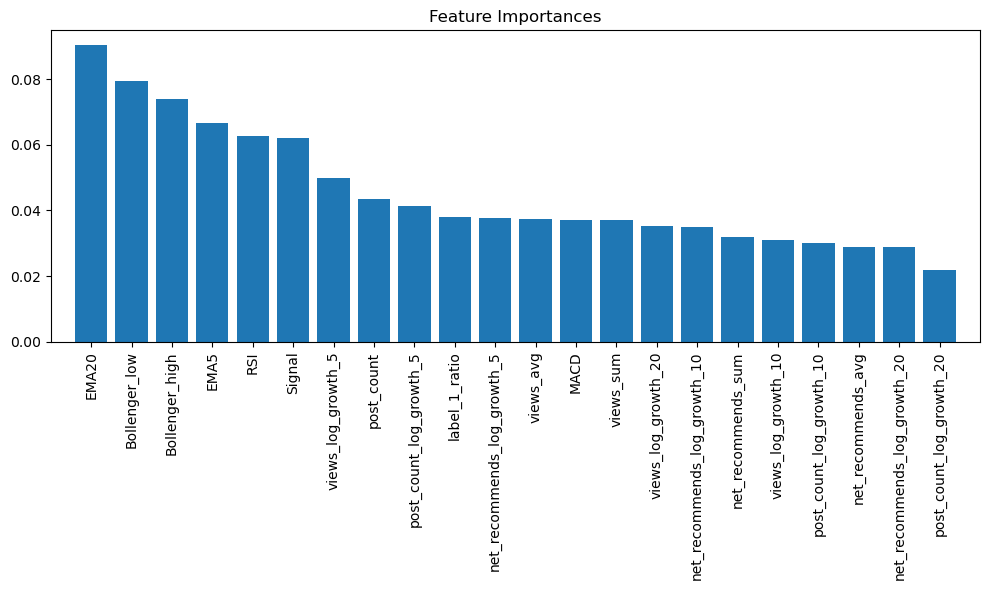

테스트 데이터에서 실제로 수익률이 10% 넘는 경우:
          Date  Actual_Return
23  2021-08-12      15.878882
24  2021-08-19      28.331174
45  2022-07-01      15.308792
81  2023-10-30      14.776632
83  2023-12-13      44.956772
..         ...            ...
892 2022-05-06      41.905223
895 2022-07-06      23.639482
925 2023-09-08      12.105263
934 2024-01-16      17.201835
935 2024-01-29      12.361331

[103 rows x 2 columns]


In [12]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score
import matplotlib.pyplot as plt

# CSV 파일 경로
file_path = 'merged_data.csv'

# CSV 파일 로드
data = pd.read_csv(file_path)

# 데이터 확인
print(data.head())

# 날짜를 인덱스로 설정
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# 결측치 처리 (필요 시)
data.dropna(inplace=True)

# 목표 변수 설정
data['Target'] = (data['Close'].shift(-5) > data['Close'] * 1.10).astype(int)

# 마지막 5일은 목표 변수가 없으므로 제거
data.dropna(inplace=True)

# 특징 변수 선택
features = data[['EMA5', 'EMA20', 'MACD', 'Signal', 'Bollenger_high', 'Bollenger_low', 'RSI', 'post_count', 'views_sum', 'net_recommends_sum', 'views_avg', 'net_recommends_avg', 'views_log_growth_5', 'net_recommends_log_growth_5', 'post_count_log_growth_5', 'views_log_growth_10', 'net_recommends_log_growth_10', 'post_count_log_growth_10', 'views_log_growth_20', 'net_recommends_log_growth_20', 'post_count_log_growth_20', 'label_1_ratio']]
target = data['Target']

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [30, 50],
    'max_features': [0.3, 0.5, 0.7]
}

# 랜덤 포레스트 분류 모델 생성
rf = RandomForestClassifier(random_state=42)

# KFold 설정
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# 교차 검증 수행
accuracy_scores = []
precision_scores = []
average_returns = []
predicted_count_10 = []
actual_count_10 = []

for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    
    # 10% 이상 상승으로 예측된 날짜 필터링
    predicted_dates_10 = X_test.copy()
    predicted_dates_10['Predicted'] = y_pred
    predicted_dates_10 = predicted_dates_10[predicted_dates_10['Predicted'] == 1]
    
    # 예측된 날짜의 실제 수익률 계산
    predicted_dates_10['Actual_Close_5Days'] = data['Close'].shift(-5).iloc[test_index]
    predicted_dates_10['Close'] = data['Close'].iloc[test_index]
    predicted_dates_10['Actual_Return'] = (predicted_dates_10['Actual_Close_5Days'] - predicted_dates_10['Close']) / predicted_dates_10['Close'] * 100
    
    # 실제 수익률이 10% 이상인지 확인
    actual_10 = predicted_dates_10[predicted_dates_10['Actual_Return'] > 10]
    average_return = actual_10['Actual_Return'].mean()
    average_returns.append(average_return)
    
    predicted_count_10.append(len(predicted_dates_10))
    actual_count_10.append(len(actual_10))
    
    print(f'Fold 결과: 정확도: {accuracy * 100:.2f}%, 정밀도: {precision * 100:.2f}%')
    print('분류 보고서:\n', classification_report(y_test, y_pred))
    print(f'Fold에서 10% 이상 상승으로 예측된 경우의 평균 실제 수익률: {average_return:.2f}%')
    print(f'Fold에서 10% 이상 상승으로 예측한 경우의 수: {len(predicted_dates_10)}')
    print(f'Fold에서 실제로 10% 이상 상승한 경우의 수: {len(actual_10)}')

# 전체 교차 검증 결과 출력
print(f'\n전체 10-fold 교차 검증 결과:')
print(f'평균 정확도: {np.mean(accuracy_scores) * 100:.2f}%')
print(f'평균 정밀도: {np.mean(precision_scores) * 100:.2f}%')
print(f'평균 예측된 10% 이상 수익의 실제 평균 수익률: {np.nanmean(average_returns):.2f}%')
print(f'평균 10% 이상 상승으로 예측한 경우의 수: {np.mean(predicted_count_10):.2f}')
print(f'평균 실제로 10% 이상 상승한 경우의 수: {np.mean(actual_count_10):.2f}')

# 최적 모델로 전체 데이터 학습
best_model.fit(features, target)

# 특징 중요도 시각화
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = features.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.tight_layout()
plt.show()

# 테스트 데이터에서 실제로 수익률이 10% 넘는 경우를 출력
all_test_indices = np.concatenate([test_index for _, test_index in kf.split(features)])
all_predictions = np.concatenate([best_model.predict(features.iloc[test_index]) for _, test_index in kf.split(features)])
all_true_values = target.iloc[all_test_indices].values

test_results = pd.DataFrame({
    'Date': data.index[all_test_indices],
    'Actual': all_true_values,
    'Predicted': all_predictions
})

test_results['Close'] = data['Close'].iloc[all_test_indices].values
test_results['Close_5Days'] = data['Close'].shift(-5).iloc[all_test_indices].values
test_results['Actual_Return'] = (test_results['Close_5Days'] - test_results['Close']) / test_results['Close'] * 100
actual_test_10 = test_results[test_results['Actual_Return'] > 10]

# 결과 출력
print('테스트 데이터에서 실제로 수익률이 10% 넘는 경우:')
print(actual_test_10[['Date', 'Actual_Return']])


         date  post_count  views_sum  net_recommends_sum  views_avg  \
0  2020-09-01         685   137502.0              1562.0   137502.0   
1  2020-09-02        1777   341804.0              3208.0   341804.0   
2  2020-09-03         767   170554.0              2224.0   170554.0   
3  2020-09-04         606   142396.0              1820.0   142396.0   
4  2020-09-07        2083   423958.0              4331.0   423958.0   

   net_recommends_avg  views_log_growth_5  net_recommends_log_growth_5  \
0              1598.0            0.479788                     0.262552   
1              3244.0            1.552611                     1.547871   
2              2260.0            1.742331                     1.921002   
3              1856.0            1.434607                     1.040018   
4              4367.0            0.215397                     0.297269   

   post_count_log_growth_5  views_log_growth_10  ...  Close    Volume  \
0                 0.326883             1.292044  ...  4

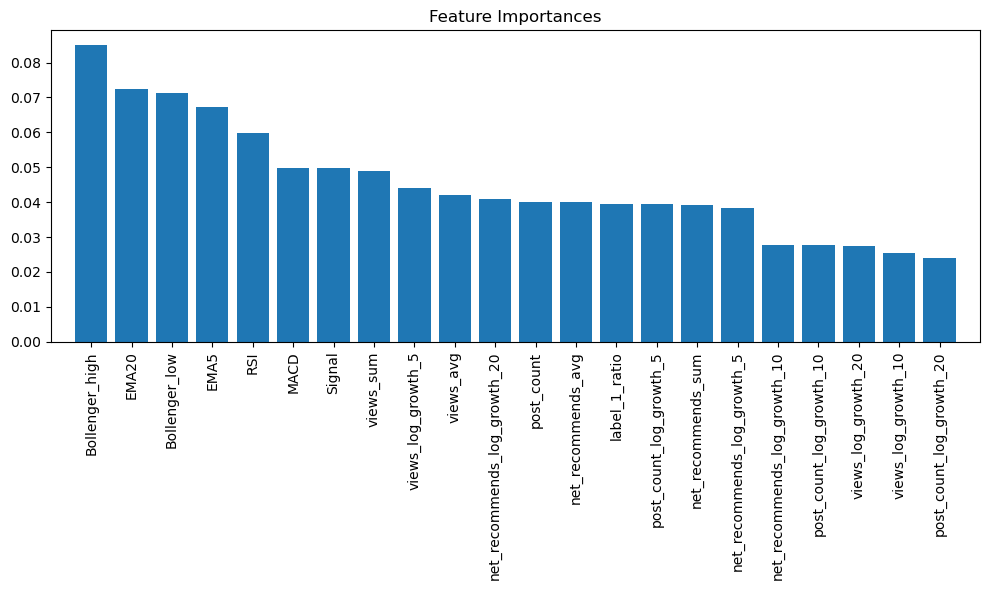

테스트 데이터에서 실제로 수익률이 10% 넘는 경우:
          Date  Actual_Return
55  2022-05-10      58.138189
59  2022-07-29      13.469051
85  2023-12-14      25.092707
88  2024-01-29      12.361331
92  2024-05-20      19.574468
..         ...            ...
925 2023-12-18      12.500000
928 2024-01-23      36.594912
932 2024-03-18      17.623762
935 2024-04-18      12.641316
938 2024-05-24      20.710059

[103 rows x 2 columns]


In [27]:
# 중요코드
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score
import matplotlib.pyplot as plt

# CSV 파일 경로
file_path = 'merged_data.csv'

# CSV 파일 로드
data = pd.read_csv(file_path)

# 데이터 확인
print(data.head())

# 날짜를 인덱스로 설정
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# 결측치 처리 (필요 시)
data.dropna(inplace=True)

# 목표 변수 설정
data['Target'] = (data['Close'].shift(-5) > data['Close'] * 1.10).astype(int)

# 마지막 5일은 목표 변수가 없으므로 제거
data.dropna(inplace=True)

# 특징 변수 선택
features = data[['EMA5', 'EMA20', 'MACD', 'Signal', 'Bollenger_high', 'Bollenger_low', 'RSI', 'post_count', 'views_sum', 'net_recommends_sum', 'views_avg', 'net_recommends_avg', 'views_log_growth_5', 'net_recommends_log_growth_5', 'post_count_log_growth_5', 'views_log_growth_10', 'net_recommends_log_growth_10', 'post_count_log_growth_10', 'views_log_growth_20', 'net_recommends_log_growth_20', 'post_count_log_growth_20', 'label_1_ratio']]
target = data['Target']

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [30, 50],
    'max_features': [0.3, 0.5, 0.7]
}

# 랜덤 포레스트 분류 모델 생성
rf = RandomForestClassifier(random_state=42)

# KFold 설정
kf = KFold(n_splits=10, shuffle=True)

# 교차 검증 수행
accuracy_scores = []
precision_scores = []
average_returns = []
predicted_count_10 = []
actual_count_10 = []
predicted_actual_count_10 = []

for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    
    # 10% 이상 상승으로 예측된 날짜 필터링
    predicted_dates_10 = X_test.copy()
    predicted_dates_10['Predicted'] = y_pred
    predicted_dates_10 = predicted_dates_10[predicted_dates_10['Predicted'] == 1]
    
    # 예측된 날짜의 실제 수익률 계산
    predicted_dates_10['Actual_Close_5Days'] = data['Close'].shift(-5).iloc[test_index]
    predicted_dates_10['Close'] = data['Close'].iloc[test_index]
    predicted_dates_10['Actual_Return'] = (predicted_dates_10['Actual_Close_5Days'] - predicted_dates_10['Close']) / predicted_dates_10['Close'] * 100
    
    # 실제 수익률이 10% 이상인지 확인
    actual_10 = data.iloc[test_index][(data['Close'].shift(-5) > data['Close'] * 1.10).iloc[test_index]]
    actual_count_10.append(len(actual_10))
    
    # 모델이 예측한 10% 이상 상승한 경우 중 실제로 10% 이상 상승한 경우
    predicted_actual_10 = predicted_dates_10[predicted_dates_10['Actual_Return'] > 10]
    predicted_actual_count_10.append(len(predicted_actual_10))
    
    predicted_count_10.append(len(predicted_dates_10))
    average_return = predicted_actual_10['Actual_Return'].mean()
    average_returns.append(average_return)
    
    print(f'Fold 결과: 정확도: {accuracy * 100:.2f}%, 정밀도: {precision * 100:.2f}%')
    print('분류 보고서:\n', classification_report(y_test, y_pred))
    print(f'Fold에서 10% 이상 상승으로 예측된 경우의 평균 실제 수익률: {average_return:.2f}%')
    print(f'Fold에서 실제 10% 이상 상승한 경우의 수: {len(actual_10)}')
    print(f'Fold에서 10% 이상 상승으로 예측한 경우의 수: {len(predicted_dates_10)}')
    print(f'Fold에서 10% 이상 상승으로 예측한 경우 중 실제 10% 이상 상승한 경우의 수: {len(predicted_actual_10)}')

# 전체 교차 검증 결과 출력
print(f'\n전체 10-fold 교차 검증 결과:')
print(f'평균 정확도: {np.mean(accuracy_scores) * 100:.2f}%')
print(f'평균 정밀도: {np.mean(precision_scores) * 100:.2f}%')
print(f'평균 예측된 10% 이상 수익의 실제 평균 수익률: {np.nanmean(average_returns):.2f}%')
print(f'실제 10% 이상 상승한 경우의 수: {np.sum(actual_count_10)}')
print(f'모델이 10% 이상 상승으로 예측한 경우의 수: {np.sum(predicted_count_10)}')
print(f'모델이 10% 이상 상승으로 예측한 경우 중 실제 10% 이상 상승한 경우의 수: {np.sum(predicted_actual_count_10)}')

# 최적 모델로 전체 데이터 학습
best_model.fit(features, target)

# 특징 중요도 시각화
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = features.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.tight_layout()
plt.show()

# 테스트 데이터에서 실제로 수익률이 10% 넘는 경우를 출력
all_test_indices = np.concatenate([test_index for _, test_index in kf.split(features)])
all_predictions = np.concatenate([best_model.predict(features.iloc[test_index]) for _, test_index in kf.split(features)])
all_true_values = target.iloc[all_test_indices].values

test_results = pd.DataFrame({
    'Date': data.index[all_test_indices],
    'Actual': all_true_values,
    'Predicted': all_predictions
})

test_results['Close'] = data['Close'].iloc[all_test_indices].values
test_results['Close_5Days'] = data['Close'].shift(-5).iloc[all_test_indices].values
test_results['Actual_Return'] = (test_results['Close_5Days'] - test_results['Close']) / test_results['Close'] * 100
actual_test_10 = test_results[test_results['Actual_Return'] > 10]

# 결과 출력
print('테스트 데이터에서 실제로 수익률이 10% 넘는 경우:')
print(actual_test_10[['Date', 'Actual_Return']])


         date  post_count  views_sum  net_recommends_sum  views_avg  \
0  2020-09-01         685   137502.0              1562.0   137502.0   
1  2020-09-02        1777   341804.0              3208.0   341804.0   
2  2020-09-03         767   170554.0              2224.0   170554.0   
3  2020-09-04         606   142396.0              1820.0   142396.0   
4  2020-09-07        2083   423958.0              4331.0   423958.0   

   net_recommends_avg  views_log_growth_5  net_recommends_log_growth_5  \
0              1598.0            0.479788                     0.262552   
1              3244.0            1.552611                     1.547871   
2              2260.0            1.742331                     1.921002   
3              1856.0            1.434607                     1.040018   
4              4367.0            0.215397                     0.297269   

   post_count_log_growth_5  views_log_growth_10  ...  Close    Volume  \
0                 0.326883             1.292044  ...  4

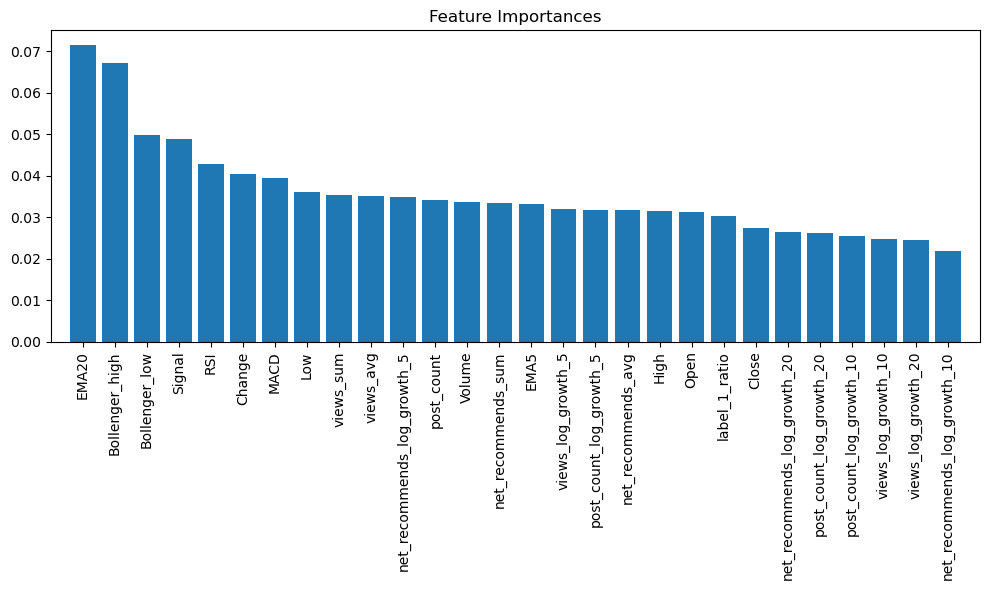

테스트 데이터에서 실제로 수익률이 10% 넘는 경우:
          Date  Actual_Return
0   2020-09-11      12.498112
6   2020-11-30      16.686223
19  2021-08-12      15.878882
36  2022-05-09      50.170068
40  2022-08-01      14.475914
..         ...            ...
899 2022-05-06      41.905223
927 2023-12-15      14.695752
931 2024-01-22      32.146597
936 2024-03-18      17.623762
940 2024-05-22      34.077079

[103 rows x 2 columns]


In [38]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score
import matplotlib.pyplot as plt

# CSV 파일 경로
file_path = 'merged_data.csv'

# CSV 파일 로드
data = pd.read_csv(file_path)

# 데이터 확인
print(data.head())

# 날짜를 인덱스로 설정
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# 결측치 처리 (필요 시)
data.dropna(inplace=True)

# 목표 변수 설정
data['Target'] = (data['Close'].shift(-5) > data['Close'] * 1.10).astype(int)

# 마지막 5일은 목표 변수가 없으므로 제거
data.dropna(inplace=True)

# 특징 변수 선택
features = data[['Close', 'Volume', 'Change', 'Open', 'High', 'Low', 'EMA5', 'EMA20', 'MACD', 'Signal', 'Bollenger_high', 'Bollenger_low', 'RSI', 'post_count', 'views_sum', 'net_recommends_sum', 'views_avg', 'net_recommends_avg', 'views_log_growth_5', 'net_recommends_log_growth_5', 'post_count_log_growth_5', 'views_log_growth_10', 'net_recommends_log_growth_10', 'post_count_log_growth_10', 'views_log_growth_20', 'net_recommends_log_growth_20', 'post_count_log_growth_20', 'label_1_ratio']]

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [30, 50, 100],
    'max_features': [0.3, 0.5, 0.7]
}

# 랜덤 포레스트 분류 모델 생성
rf = RandomForestClassifier(random_state=42)

# StratifiedKFold 설정
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=41)

# 교차 검증 수행
accuracy_scores = []
precision_scores = []
average_returns = []
predicted_count_10 = []
actual_count_10 = []
predicted_actual_count_10 = []

for train_index, test_index in skf.split(features, target):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    
    # 10% 이상 상승으로 예측된 날짜 필터링
    predicted_dates_10 = X_test.copy()
    predicted_dates_10['Predicted'] = y_pred
    predicted_dates_10 = predicted_dates_10[predicted_dates_10['Predicted'] == 1]
    
    # 예측된 날짜의 실제 수익률 계산
    predicted_dates_10['Actual_Close_5Days'] = data['Close'].shift(-5).iloc[test_index]
    predicted_dates_10['Close'] = data['Close'].iloc[test_index]
    predicted_dates_10['Actual_Return'] = (predicted_dates_10['Actual_Close_5Days'] - predicted_dates_10['Close']) / predicted_dates_10['Close'] * 100
    
    # 실제 수익률이 10% 이상인지 확인
    actual_10 = data.iloc[test_index][(data['Close'].shift(-5) > data['Close'] * 1.10).iloc[test_index]]
    actual_count_10.append(len(actual_10))
    
    # 모델이 예측한 10% 이상 상승한 경우 중 실제로 10% 이상 상승한 경우
    predicted_actual_10 = predicted_dates_10[predicted_dates_10['Actual_Return'] > 10]
    predicted_actual_count_10.append(len(predicted_actual_10))
    
    predicted_count_10.append(len(predicted_dates_10))
    average_return = predicted_actual_10['Actual_Return'].mean()
    average_returns.append(average_return)
    
    print(f'Fold 결과: 정확도: {accuracy * 100:.2f}%, 정밀도: {precision * 100:.2f}%')
    print('분류 보고서:\n', classification_report(y_test, y_pred, zero_division=1))
    print(f'Fold에서 10% 이상 상승으로 예측된 경우의 평균 실제 수익률: {average_return:.2f}%')
    print(f'Fold에서 실제 10% 이상 상승한 경우의 수: {len(actual_10)}')
    print(f'Fold에서 10% 이상 상승으로 예측한 경우의 수: {len(predicted_dates_10)}')
    print(f'Fold에서 10% 이상 상승으로 예측한 경우 중 실제 10% 이상 상승한 경우의 수: {len(predicted_actual_10)}')

# 전체 교차 검증 결과 출력
print(f'\n전체 10-fold 교차 검증 결과:')
print(f'평균 정확도: {np.mean(accuracy_scores) * 100:.2f}%')
print(f'평균 정밀도: {np.mean(precision_scores) * 100:.2f}%')
print(f'평균 예측된 10% 이상 수익의 실제 평균 수익률: {np.nanmean(average_returns):.2f}%')
print(f'실제 10% 이상 상승한 경우의 수: {np.sum(actual_count_10)}')
print(f'모델이 10% 이상 상승으로 예측한 경우의 수: {np.sum(predicted_count_10)}')
print(f'모델이 10% 이상 상승으로 예측한 경우 중 실제 10% 이상 상승한 경우의 수: {np.sum(predicted_actual_count_10)}')

# 최적 모델로 전체 데이터 학습
best_model.fit(features, target)

# 특징 중요도 시각화
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = features.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.tight_layout()
plt.show()

# 테스트 데이터에서 실제로 수익률이 10% 넘는 경우를 출력
all_test_indices = np.concatenate([test_index for _, test_index in skf.split(features, target)])
all_predictions = np.concatenate([best_model.predict(features.iloc[test_index]) for _, test_index in skf.split(features, target)])
all_true_values = target.iloc[all_test_indices].values

test_results = pd.DataFrame({
    'Date': data.index[all_test_indices],
    'Actual': all_true_values,
    'Predicted': all_predictions
})

test_results['Close'] = data['Close'].iloc[all_test_indices].values
test_results['Close_5Days'] = data['Close'].shift(-5).iloc[all_test_indices].values
test_results['Actual_Return'] = (test_results['Close_5Days'] - test_results['Close']) / test_results['Close'] * 100
actual_test_10 = test_results[test_results['Actual_Return'] > 10]

# 결과 출력
print('테스트 데이터에서 실제로 수익률이 10% 넘는 경우:')
print(actual_test_10[['Date', 'Actual_Return']])


         date  post_count  views_sum  net_recommends_sum  views_avg  \
0  2020-09-01         685   137502.0              1562.0   137502.0   
1  2020-09-02        1777   341804.0              3208.0   341804.0   
2  2020-09-03         767   170554.0              2224.0   170554.0   
3  2020-09-04         606   142396.0              1820.0   142396.0   
4  2020-09-07        2083   423958.0              4331.0   423958.0   

   net_recommends_avg  views_log_growth_5  net_recommends_log_growth_5  \
0              1598.0            0.479788                     0.262552   
1              3244.0            1.552611                     1.547871   
2              2260.0            1.742331                     1.921002   
3              1856.0            1.434607                     1.040018   
4              4367.0            0.215397                     0.297269   

   post_count_log_growth_5  views_log_growth_10  ...  Close    Volume  \
0                 0.326883             1.292044  ...  4

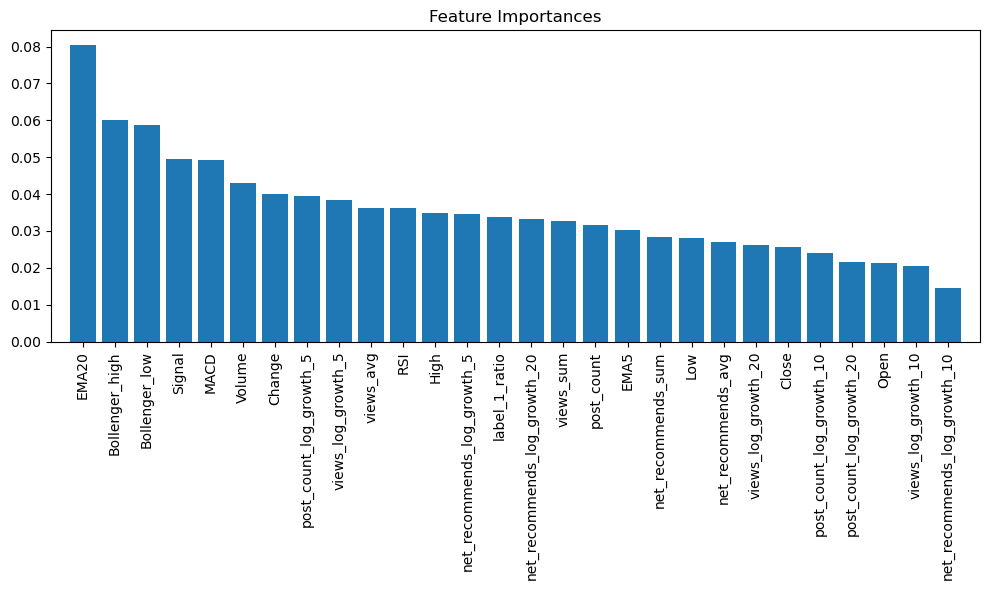

테스트 데이터에서 실제로 수익률이 10% 넘는 경우:
          Date  Actual_Return
0   2020-09-11      12.498112
6   2020-11-30      16.686223
19  2021-08-12      15.878882
36  2022-05-09      50.170068
40  2022-08-01      14.475914
..         ...            ...
899 2022-05-06      41.905223
927 2023-12-15      14.695752
931 2024-01-22      32.146597
936 2024-03-18      17.623762
940 2024-05-22      34.077079

[103 rows x 2 columns]


In [42]:
# 필요한 라이브러리 불러오기
# 중요 코드(smote)
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# CSV 파일 경로
file_path = 'merged_data.csv'

# CSV 파일 로드
data = pd.read_csv(file_path)

# 데이터 확인
print(data.head())

# 날짜를 인덱스로 설정
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# 결측치 처리 (필요 시)
data.dropna(inplace=True)

# 목표 변수 설정
data['Target'] = (data['Close'].shift(-5) > data['Close'] * 1.10).astype(int)

# 마지막 5일은 목표 변수가 없으므로 제거
data.dropna(inplace=True)

# 특징 변수 선택
features = data[['Close', 'Volume', 'Change', 'Open', 'High', 'Low', 'EMA5', 'EMA20', 'MACD', 'Signal', 'Bollenger_high', 'Bollenger_low', 'RSI', 'post_count', 'views_sum', 'net_recommends_sum', 'views_avg', 'net_recommends_avg', 'views_log_growth_5', 'net_recommends_log_growth_5', 'post_count_log_growth_5', 'views_log_growth_10', 'net_recommends_log_growth_10', 'post_count_log_growth_10', 'views_log_growth_20', 'net_recommends_log_growth_20', 'post_count_log_growth_20', 'label_1_ratio']]
target = data['Target']

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [30, 50, 100],
    'max_features': [0.3, 0.5, 0.7]
}

# 랜덤 포레스트 분류 모델 생성
rf = RandomForestClassifier(random_state=42)

# StratifiedKFold 설정
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=41)

# SMOTE 설정
smote = SMOTE(random_state=42)

# 교차 검증 수행
accuracy_scores = []
precision_scores = []
average_returns = []
predicted_count_10 = []
actual_count_10 = []
predicted_actual_count_10 = []

for train_index, test_index in skf.split(features, target):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # SMOTE 적용
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train_resampled, y_train_resampled)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    
    # 10% 이상 상승으로 예측된 날짜 필터링
    predicted_dates_10 = X_test.copy()
    predicted_dates_10['Predicted'] = y_pred
    predicted_dates_10 = predicted_dates_10[predicted_dates_10['Predicted'] == 1]
    
    # 예측된 날짜의 실제 수익률 계산
    predicted_dates_10['Actual_Close_5Days'] = data['Close'].shift(-5).iloc[test_index]
    predicted_dates_10['Close'] = data['Close'].iloc[test_index]
    predicted_dates_10['Actual_Return'] = (predicted_dates_10['Actual_Close_5Days'] - predicted_dates_10['Close']) / predicted_dates_10['Close'] * 100
    
    # 실제 수익률이 10% 이상인지 확인
    actual_10 = data.iloc[test_index][(data['Close'].shift(-5) > data['Close'] * 1.10).iloc[test_index]]
    actual_count_10.append(len(actual_10))
    
    # 모델이 예측한 10% 이상 상승한 경우 중 실제로 10% 이상 상승한 경우
    predicted_actual_10 = predicted_dates_10[predicted_dates_10['Actual_Return'] > 10]
    predicted_actual_count_10.append(len(predicted_actual_10))
    
    predicted_count_10.append(len(predicted_dates_10))
    average_return = predicted_actual_10['Actual_Return'].mean()
    average_returns.append(average_return)
    
    print(f'Fold 결과: 정확도: {accuracy * 100:.2f}%, 정밀도: {precision * 100:.2f}%')
    print('분류 보고서:\n', classification_report(y_test, y_pred, zero_division=1))
    print(f'Fold에서 10% 이상 상승으로 예측된 경우의 평균 실제 수익률: {average_return:.2f}%')
    print(f'Fold에서 실제 10% 이상 상승한 경우의 수: {len(actual_10)}')
    print(f'Fold에서 10% 이상 상승으로 예측한 경우의 수: {len(predicted_dates_10)}')
    print(f'Fold에서 10% 이상 상승으로 예측한 경우 중 실제 10% 이상 상승한 경우의 수: {len(predicted_actual_10)}')

# 전체 교차 검증 결과 출력
print(f'\n전체 10-fold 교차 검증 결과:')
print(f'평균 정확도: {np.mean(accuracy_scores) * 100:.2f}%')
print(f'평균 정밀도: {np.mean(precision_scores) * 100:.2f}%')
print(f'평균 예측된 10% 이상 수익의 실제 평균 수익률: {np.nanmean(average_returns):.2f}%')
print(f'실제 10% 이상 상승한 경우의 수: {np.sum(actual_count_10)}')
print(f'모델이 10% 이상 상승으로 예측한 경우의 수: {np.sum(predicted_count_10)}')
print(f'모델이 10% 이상 상승으로 예측한 경우 중 실제 10% 이상 상승한 경우의 수: {np.sum(predicted_actual_count_10)}')

# 최적 모델로 전체 데이터 학습
best_model.fit(features, target)

# 특징 중요도 시각화
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = features.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.tight_layout()
plt.show()

# 테스트 데이터에서 실제로 수익률이 10% 넘는 경우를 출력
all_test_indices = np.concatenate([test_index for _, test_index in skf.split(features, target)])
all_predictions = np.concatenate([best_model.predict(features.iloc[test_index]) for _, test_index in skf.split(features, target)])
all_true_values = target.iloc[all_test_indices].values

test_results = pd.DataFrame({
    'Date': data.index[all_test_indices],
    'Actual': all_true_values,
    'Predicted': all_predictions
})

test_results['Close'] = data['Close'].iloc[all_test_indices].values
test_results['Close_5Days'] = data['Close'].shift(-5).iloc[all_test_indices].values
test_results['Actual_Return'] = (test_results['Close_5Days'] - test_results['Close']) / test_results['Close'] * 100
actual_test_10 = test_results[test_results['Actual_Return'] > 10]

# 결과 출력
print('테스트 데이터에서 실제로 수익률이 10% 넘는 경우:')
print(actual_test_10[['Date', 'Actual_Return']])


         date  post_count  views_sum  net_recommends_sum  views_avg  \
0  2020-09-01         685   137502.0              1562.0   137502.0   
1  2020-09-02        1777   341804.0              3208.0   341804.0   
2  2020-09-03         767   170554.0              2224.0   170554.0   
3  2020-09-04         606   142396.0              1820.0   142396.0   
4  2020-09-07        2083   423958.0              4331.0   423958.0   

   net_recommends_avg  views_log_growth_5  net_recommends_log_growth_5  \
0              1598.0            0.479788                     0.262552   
1              3244.0            1.552611                     1.547871   
2              2260.0            1.742331                     1.921002   
3              1856.0            1.434607                     1.040018   
4              4367.0            0.215397                     0.297269   

   post_count_log_growth_5  views_log_growth_10  ...  Close    Volume  \
0                 0.326883             1.292044  ...  4

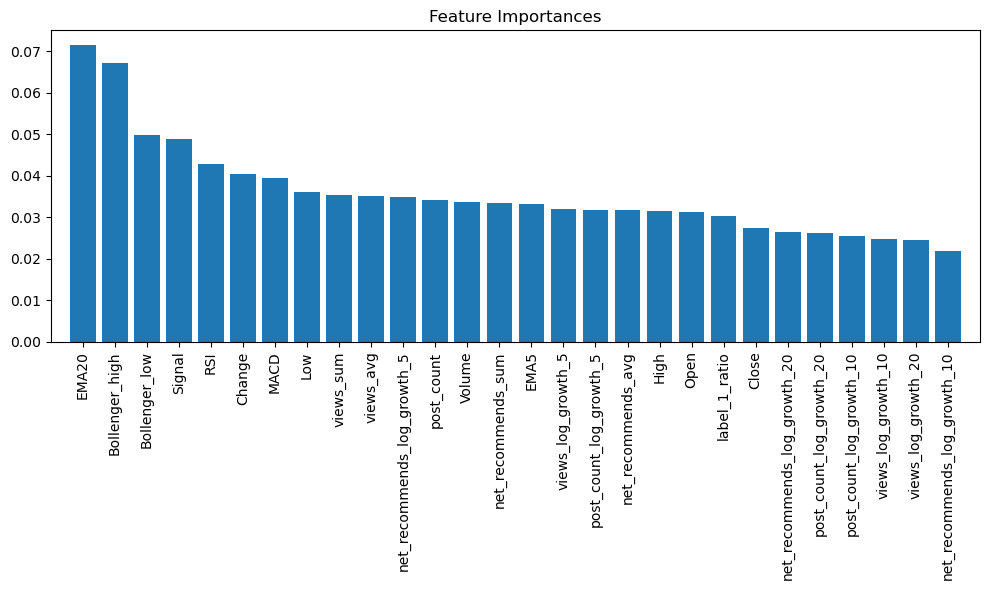

테스트 데이터에서 실제로 수익률이 10% 넘는 경우:
                 Date  Actual_Return
Date                                
2023-12-15 2023-12-15      14.695752
2022-05-09 2022-05-09      50.170068
2021-03-11 2021-03-11      11.950844
2022-07-29 2022-07-29      13.469051
2022-08-02 2022-08-02      16.356248
2024-01-24 2024-01-24      36.969697
2022-07-28 2022-07-28      14.640301
2020-09-01 2020-09-01      15.726652
2023-02-17 2023-02-17      15.891641
2021-08-23 2021-08-23      41.350200
2021-08-30 2021-08-30      11.051913
2023-01-02 2023-01-02      13.438052
2022-08-01 2022-08-01      14.475914
2024-01-17 2024-01-17      14.982578
2024-02-29 2024-02-29      20.245399
2024-04-19 2024-04-19      10.100000
2023-10-31 2023-10-31      13.298791
2021-08-20 2021-08-20      29.089057
2021-08-27 2021-08-27      20.482903
2024-03-07 2024-03-07      28.285357
2020-11-30 2020-11-30      16.686223


In [41]:
# 실제 모델
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# CSV 파일 경로
file_path = 'merged_data.csv'

# CSV 파일 로드
data = pd.read_csv(file_path)

# 데이터 확인
print(data.head())

# 날짜를 인덱스로 설정
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# 결측치 처리 (필요 시)
data.dropna(inplace=True)

# 목표 변수 설정
data['Target'] = (data['Close'].shift(-5) > data['Close'] * 1.10).astype(int)

# 마지막 5일은 목표 변수가 없으므로 제거
data.dropna(inplace=True)

# 특징 변수 선택
features = data[['Close', 'Volume', 'Change', 'Open', 'High', 'Low', 'EMA5', 'EMA20', 'MACD', 'Signal', 'Bollenger_high', 'Bollenger_low', 'RSI', 'post_count', 'views_sum', 'net_recommends_sum', 'views_avg', 'net_recommends_avg', 'views_log_growth_5', 'net_recommends_log_growth_5', 'post_count_log_growth_5', 'views_log_growth_10', 'net_recommends_log_growth_10', 'post_count_log_growth_10', 'views_log_growth_20', 'net_recommends_log_growth_20', 'post_count_log_growth_20', 'label_1_ratio']]
target = data['Target']

# 데이터 분할 (Stratified Shuffle Split)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_index, test_index = next(sss.split(features, target))
X_train, X_test = features.iloc[train_index], features.iloc[test_index]
y_train, y_test = target.iloc[train_index], target.iloc[test_index]

# SMOTE 설정
smote = SMOTE(random_state=42)

# SMOTE 적용
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [30, 50, 100],
    'max_features': [0.3, 0.5, 0.7]
}

# 랜덤 포레스트 분류 모델 생성
rf = RandomForestClassifier(random_state=42)

# GridSearchCV 설정 및 모델 학습
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# 최적 모델 선택
best_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측
y_pred = best_model.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)

print(f'테스트 결과: 정확도: {accuracy * 100:.2f}%, 정밀도: {precision * 100:.2f}%')
print('분류 보고서:\n', classification_report(y_test, y_pred, zero_division=1))

# 10% 이상 상승으로 예측된 날짜 필터링
predicted_dates_10 = X_test.copy()
predicted_dates_10['Predicted'] = y_pred
predicted_dates_10 = predicted_dates_10[predicted_dates_10['Predicted'] == 1]

# 예측된 날짜의 실제 수익률 계산
predicted_dates_10['Actual_Close_5Days'] = data['Close'].shift(-5).iloc[test_index]
predicted_dates_10['Close'] = data['Close'].iloc[test_index]
predicted_dates_10['Actual_Return'] = (predicted_dates_10['Actual_Close_5Days'] - predicted_dates_10['Close']) / predicted_dates_10['Close'] * 100

# 실제 수익률이 10% 이상인지 확인
actual_10 = data.iloc[test_index][(data['Close'].shift(-5) > data['Close'] * 1.10).iloc[test_index]]

# 모델이 예측한 10% 이상 상승한 경우 중 실제로 10% 이상 상승한 경우
predicted_actual_10 = predicted_dates_10[predicted_dates_10['Actual_Return'] > 10]

# 평균 수익률 계산
average_return = predicted_actual_10['Actual_Return'].mean()

print(f'평균 예측된 10% 이상 수익의 실제 평균 수익률: {average_return:.2f}%')
print(f'실제 10% 이상 상승한 경우의 수: {len(actual_10)}')
print(f'모델이 10% 이상 상승으로 예측한 경우의 수: {len(predicted_dates_10)}')
print(f'모델이 10% 이상 상승으로 예측한 경우 중 실제 10% 이상 상승한 경우의 수: {len(predicted_actual_10)}')

# 최적 모델로 전체 데이터 학습
best_model.fit(features, target)

# 특징 중요도 시각화
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = features.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.tight_layout()
plt.show()

# 테스트 데이터에서 실제로 수익률이 10% 넘는 경우를 출력
test_results = pd.DataFrame({
    'Date': data.index[test_index],
    'Actual': y_test,
    'Predicted': y_pred
})

test_results['Close'] = data['Close'].iloc[test_index].values
test_results['Close_5Days'] = data['Close'].shift(-5).iloc[test_index].values
test_results['Actual_Return'] = (test_results['Close_5Days'] - test_results['Close']) / test_results['Close'] * 100
actual_test_10 = test_results[test_results['Actual_Return'] > 10]

# 결과 출력
print('테스트 데이터에서 실제로 수익률이 10% 넘는 경우:')
print(actual_test_10[['Date', 'Actual_Return']])

